# TOHacks 2021 Data Analyst Coordinator Assessment
### By: Ryan Awad

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from scipy.stats import pearsonr
import pandas as pd
import matplotlib.pyplot as plt

## 1. Read the file and display columns.

In [15]:
data = pd.read_csv('cruise_ship_info.csv')
data

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00
...,...,...,...,...,...,...,...,...,...
153,Taurus,Star,22,3.341,0.66,2.79,0.33,50.62,0.59
154,Virgo,Star,14,76.800,19.60,8.79,9.67,39.18,12.00
155,Spirit,Windstar,25,5.350,1.58,4.40,0.74,33.86,0.88
156,Star,Windstar,27,5.350,1.67,4.40,0.74,32.04,0.88


## 2. Calculate basic statistics of the data (count, mean, std, etc) and examine data and state your observations.

My observations: 
 - There are **no** missing values in the entire dataset
 - There are 158 ships recorded in this dataset
 - The average age of a ship is around 16 years old
 - There are 20 unique cruise lines for the ships in the dataset
 - The `Ship_name` and `Cruise_line` columns are nominal categorical columns

<br>

Description of each column:
 - `Ship_name`: The name of the ship
 - `Cruise_line`: The line of the ship
 - `Age`: The age of the ship (recorded up to 2013)
 - `Tonnage`: The weight of the ship (in tonnage)
 - `passengers`: The number of passengers on board (divided by `100`)
 - `length`: The length of the ship **in feet** (divided by `100`)
 - `cabins`: The number of cabins in the ship (divided by `100`)
 - `passenger_density`: The passenger density on the ship (passenger space ratio -> space per person onboard)
 - `crew`: The number of crews available on the ship (divided by `100`)

<br>

<img src='https://i.imgur.com/3MhW5hk.png' width='400px'/>
<br><h3>(5.94 ft =~ 181 m)</h3><br>
<img src='https://i.imgur.com/Uyh2UOV.png' width='300px'/>

In [16]:
missing_vals = data.isnull().sum() # number of missing values in each column
dtypes = data.dtypes # data type in each column
unique_vals = data.apply(pd.Series.nunique) # number of unique values in each column

print(f'Total amount of missing values: {missing_vals.sum()}\n\n')

for i in range(len(data.columns)): # for every column in the dataframe
    col = data.columns[i] # current column name
    count = data[col].count()
    missing = missing_vals[i]
    dtype = dtypes[i]
    unique_val = unique_vals[i]

    mean, median, std, minimum, maximum = 'N/A', 'N/A', 'N/A', 'N/A', 'N/A' # default value is N/A, until the current column does not have a dtype of object
    if data[col].dtype != object: # if the current column does NOT have a dtype of object
        mean = data[col].mean()
        median = data[col].median()
        std = data[col].std()
        minimum = data[col].min()
        maximum = data[col].max()
    
    print(f'Column: {col}')
    print(f'Count: {count}')
    print(f'Mean: {mean}')
    print(f'Median: {median}')
    print(f'STD: {std}')
    print(f'Min: {minimum}')
    print(f'Max: {maximum}')
    print(f'Data Type: {dtype}')
    print(f'Amount of Missing Values: {missing}')
    print(f'Number of Unique Values: {unique_val}\n\n')

Total amount of missing values: 0


Column: Ship_name
Count: 158
Mean: N/A
Median: N/A
STD: N/A
Min: N/A
Max: N/A
Data Type: object
Amount of Missing Values: 0
Number of Unique Values: 138


Column: Cruise_line
Count: 158
Mean: N/A
Median: N/A
STD: N/A
Min: N/A
Max: N/A
Data Type: object
Amount of Missing Values: 0
Number of Unique Values: 20


Column: Age
Count: 158
Mean: 15.689873417721518
Median: 14.0
STD: 7.615691058751412
Min: 4
Max: 48
Data Type: int64
Amount of Missing Values: 0
Number of Unique Values: 31


Column: Tonnage
Count: 158
Mean: 71.28467088607599
Median: 71.899
STD: 37.22954002590786
Min: 2.329
Max: 220.0
Data Type: float64
Amount of Missing Values: 0
Number of Unique Values: 94


Column: passengers
Count: 158
Mean: 18.45740506329114
Median: 19.5
STD: 9.677094775143413
Min: 0.66
Max: 54.0
Data Type: float64
Amount of Missing Values: 0
Number of Unique Values: 104


Column: length
Count: 158
Mean: 8.130632911392404
Median: 8.555
STD: 1.7934735480548252
Min: 2.79
Max: 

## 3. Select columns that will be probably important to predict “crew” size.

In [17]:
x = data.drop(['crew', 'Ship_name', 'Cruise_line', 'passenger_density'], axis=1) # Excluding 'crew', 'Ship_name', 'Cruise_line', and 'passenger_density'
y = data['crew']

print("x: ")
print(x.head())
print('\n\ny:')
print(y.head())

x: 
   Age  Tonnage  passengers  length  cabins
0    6   30.277        6.94    5.94    3.55
1    6   30.277        6.94    5.94    3.55
2   26   47.262       14.86    7.22    7.43
3   11  110.000       29.74    9.53   14.88
4   17  101.353       26.42    8.92   13.21


y:
0     3.55
1     3.55
2     6.70
3    19.10
4    10.00
Name: crew, dtype: float64


## 4. If you removed columns explain why you removed those.

I removed the columns `crew`, `Ship_name`, `Cruise_line`, and `passenger_density`<br>
The reasons: 
 - `crew`: The column we are trying to predict (used for the `y`)
 - `Ship_name`: No linear relation between the ship names and the crew sizes
 - `Cruise_line`: No linear relation between the cruise lines and the crew sizes
 - `passenger_density`: No linear relation between the passenger density and the crew sizes

See graphs in the next cell:

As you can see, there is no linear relation between the ship names, cruise lines, or passenger density and the crew sizes.



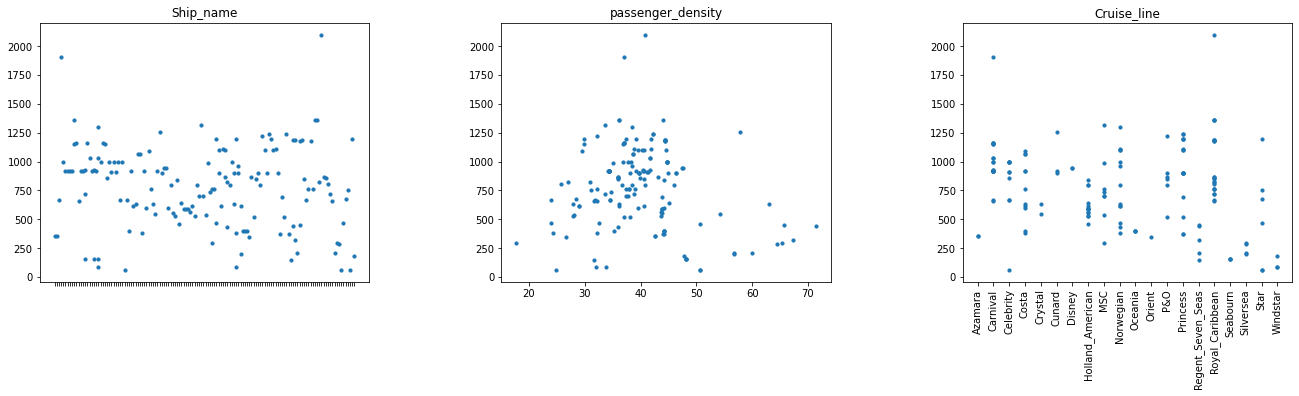

In [18]:
print('As you can see, there is no linear relation between the ship names, cruise lines, or passenger density and the crew sizes.\n')

# Plotting the relation between the columns I dropped and the crew size
fig, ax = plt.subplots(nrows=1, ncols=3)

ax[0].scatter(x=data['Ship_name'], y=data['crew']*100, s=10)
ax[0].set_xticks(range(pd.Series.nunique(data['Ship_name'])))
ax[0].set_xticklabels([])
ax[0].title.set_text('Ship_name')

ax[1].scatter(x=data['passenger_density'], y=data['crew']*100, s=10)
ax[1].title.set_text('passenger_density')

ax[2].scatter(x=data['Cruise_line'], y=data['crew']*100, s=10)
ax[2].set_xticks(range(pd.Series.nunique(data['Cruise_line'])))
ax[2].title.set_text('Cruise_line')
plt.xticks(rotation=90)

plt.subplots_adjust(
    left=0.1,
    bottom=0.1, 
    right=3, 
    top=1, 
    wspace=0.4, 
    hspace=0.4
)
plt.show()

As you can see, the columns I picked have a linear relation with the crew size



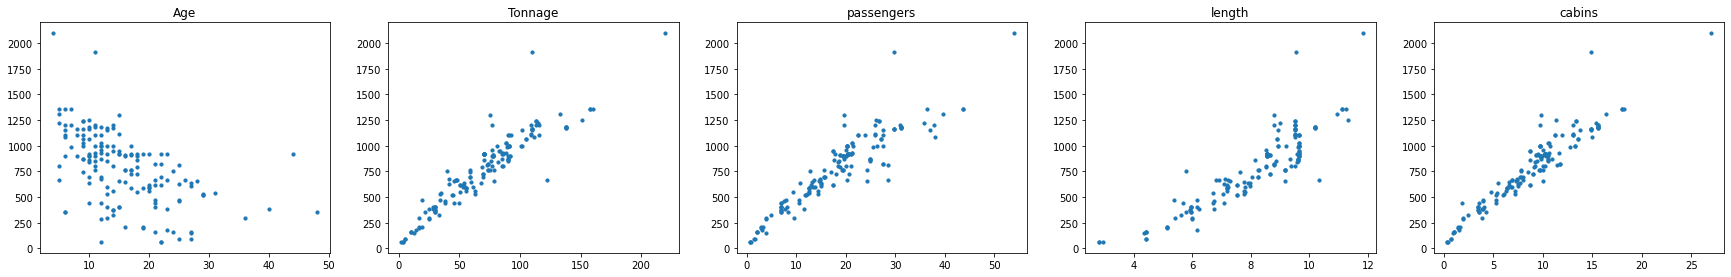

In [19]:
print('As you can see, the columns I picked have a linear relation with the crew size\n')

# Plotting the relation with all the columns I kept and the crew size
fig, ax = plt.subplots(nrows=1, ncols=5)
cols = x.columns

for i in range(len(cols)):
    ax[i].scatter(x=data[cols[i]], y=data['crew']*100, s=10)
    ax[i].title.set_text(cols[i])

plt.subplots_adjust(
    left=0.1,
    bottom=0.1, 
    right=4, 
    top=0.9, 
)
plt.show()

## 5. Use one-hot encoding for categorical features.

Since the categorical columns are nominal, using OneHot encoding is the way to go! <br><br> It's usually better to preprocess data <u>after</u> it's been split into it's train and test sets.<br>
I also recommend to only use OneHot encoding when a column's cardinality is **less than** 10. If it's more than 10, I recommend using label encoding. 

In [20]:
oh_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore') # creating the OneHot encoder
s = (data.dtypes == object)
obj_cols = list(s[s].index) # getting the categorical column names
oh_cols = pd.DataFrame(oh_encoder.fit_transform(data[obj_cols])) # OneHot encoding the categorical columns
oh_cols.columns = oh_encoder.get_feature_names(['Ship_name', 'Cruise_line'])
oh_cols.index = data.index # preserving the index of the original dataframe

num_cols = data.drop(obj_cols, axis=1) # getting only the columns containing numerical values

oh_data = pd.concat([num_cols, oh_cols], axis=1) # concatenating the numerical columns and the encoded categorical columns into one dataframe
oh_data.head()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew,Ship_name_Adventure,Ship_name_Allegra,Ship_name_Amsterdam,Ship_name_Arcadia,Ship_name_Aries,Ship_name_Armonia,Ship_name_Artemis,Ship_name_Atlantica,Ship_name_Aurora,Ship_name_Brilliance,Ship_name_Caribbean,Ship_name_Celebration,Ship_name_Century,Ship_name_Classica,Ship_name_Cloud,Ship_name_Conquest,Ship_name_Constellation,Ship_name_Coral,Ship_name_Crown,Ship_name_Dawn,Ship_name_Destiny,Ship_name_Diamond,Ship_name_Dream,Ship_name_Ecstasy,Ship_name_Elation,Ship_name_Emerald,Ship_name_Empress,Ship_name_Enchantment,Ship_name_Eurodam,Ship_name_Europa,Ship_name_Explorer,Ship_name_ExplorerII,Ship_name_Fantasia,...,Ship_name_Tahitian,Ship_name_Taurus,Ship_name_Triumph,Ship_name_Valor,Ship_name_Veendam,Ship_name_Ventura,Ship_name_Victoria,Ship_name_Victory,Ship_name_Virgo,Ship_name_Vision,Ship_name_Volendam,Ship_name_Voyager,Ship_name_Westerdam,Ship_name_Whisper,Ship_name_Wind,Ship_name_Wonder,Ship_name_Xpedition,Ship_name_Zaandam,Ship_name_Zenith,Ship_name_Zuiderdam,Cruise_line_Azamara,Cruise_line_Carnival,Cruise_line_Celebrity,Cruise_line_Costa,Cruise_line_Crystal,Cruise_line_Cunard,Cruise_line_Disney,Cruise_line_Holland_American,Cruise_line_MSC,Cruise_line_Norwegian,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,6,30.277,6.94,5.94,3.55,42.64,3.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,30.277,6.94,5.94,3.55,42.64,3.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26,47.262,14.86,7.22,7.43,31.80,6.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11,110.000,29.74,9.53,14.88,36.99,19.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,101.353,26.42,8.92,13.21,38.36,10.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6. Create training and testing sets (use 60% of the data for the training and reminder for testing).

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6, random_state=42) # using 60% for the train set and 40% for the test set
x_train.head()

,Age,Tonnage,passengers,length,cabins
10,10,110.000,29.74,9.51,14.87
108,29,44.348,12.00,7.54,6.00
104,15,108.806,26.00,9.51,13.00
0,6,30.277,6.94,5.94,3.55
114,27,12.500,3.94,4.36,0.88


## 7. Build a machine learning model to predict the ‘crew’ size.
For this dataset, we will be using a linear regression model, since the selected columns for the `x` have linear relations with the crew size. 

In [22]:
lin_reg = LinearRegression() # Creating the model
lin_reg.fit(x_train, y_train) # train the model

preds = lin_reg.predict(x_test) # make predictions

# determine the model's performance
score = lin_reg.score(x_test, y_test)
mae = mean_absolute_error(y_test, preds)

print(f'Score: {score}')
print(f'Mean Absolute Error: {mae}')

Score: 0.9369180122607723
Mean Absolute Error: 0.6924838373568067


## 8. Calculate the Pearson correlation coefficient for the training set and testing data sets.

In [23]:
train_corr, _ = pearsonr(y_train, lin_reg.predict(x_train))
test_corr, _ = pearsonr(y_test, preds)
print(f'Pearson Correlation Coefficient (TRAIN): {train_corr}')
print(f'Pearson Correlation Coefficient (TEST): {test_corr}')

Pearson Correlation Coefficient (TRAIN): 0.9541112957834549
Pearson Correlation Coefficient (TEST): 0.9707594975267027


## 9. Describe hyper-parameters in your model and how you would change them to improve the performance of the model.

I used the default hyper-parameters in my model, since I used linear regression. I would not change any hyper-parameters in my model, as my model's current hyper-parameters are at their best. 

## 10.What is regularization? What is the regularization parameter in your model?

Regularization is a technique used to prevent a model from overfitting during training. There is no regularization parameter in my model. 